In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


result_df = pd.read_csv(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\combined_leads\combined_final.csv")

In [5]:
target_column = "target" 
features = result_df.drop(columns=[target_column])
target = result_df[target_column]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA()
pca.fit(scaled_features)

PCA()

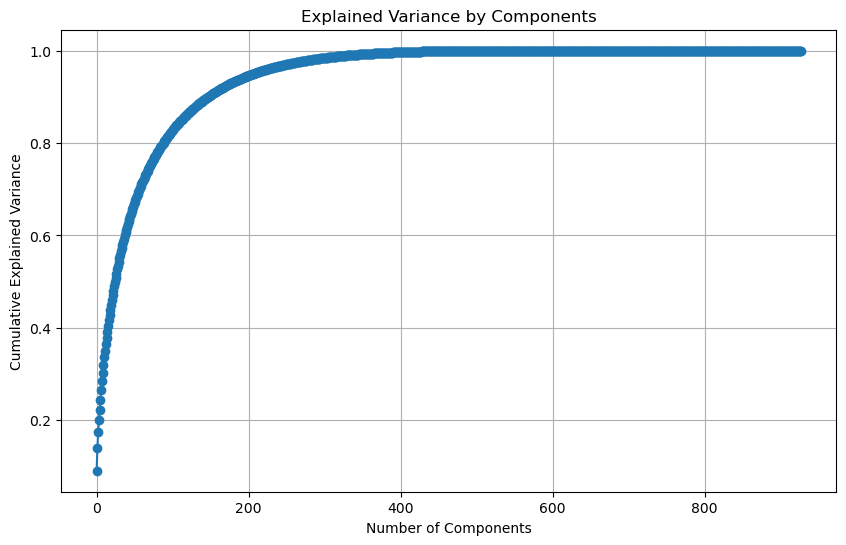

In [7]:
# Plot the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [9]:
threshold = 0.90

# Find the optimal number of components for the desired threshold
K = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal number of components for {threshold*100}% explained variance: {K}")

# Apply PCA with the selected number of components
pca = PCA(n_components=K)
principal_components = pca.fit_transform(scaled_features)

Optimal number of components for 90.0% explained variance: 148


In [11]:
# Create a DataFrame for the reduced dataset
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(K)])

# Add the target column back
pca_df[target_column] = target.values

# Save the reduced dataset to a new CSV file
output_file = "pca_reduced_dataset.csv"
pca_df.to_csv(output_file, index=False)
print(f"Reduced dataset saved to '{output_file}'.")

Reduced dataset saved to 'pca_reduced_dataset.csv'.


In [5]:
result_df = pd.read_csv("pca_reduced_dataset.csv")

In [7]:
result_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,target
0,8.946239,-19.387606,21.042407,-12.161895,-8.300957,-3.153424,7.623876,-5.276051,4.968468,13.490026,...,0.161802,0.305072,1.303604,-0.886561,-2.314811,-0.576217,-0.014158,0.506996,1.470038,2
1,-1.280266,21.794999,3.209588,0.553783,3.519012,3.700177,-0.934320,-10.084971,5.790402,-3.596815,...,0.233372,0.973792,0.821076,-0.830683,-1.636800,-1.087982,1.087630,-0.851235,-0.440233,2
2,-33.222326,-2.256294,-5.778222,-0.797436,-1.775385,11.613836,-20.171480,-0.456537,-10.257456,-14.985280,...,0.118393,-2.344677,1.322441,-1.516927,0.849351,1.688930,4.867245,0.057545,1.923952,2
3,-15.827546,-7.196189,1.667159,-8.560544,11.982318,-13.072973,-0.819314,5.240830,-3.794146,-9.164774,...,1.179513,-0.845651,-1.264306,-2.436061,-2.812878,-0.734082,0.122487,-0.671881,-3.844538,2
4,-20.525783,0.291071,-11.213705,-13.301340,-8.853036,19.264015,-6.578058,7.813388,14.772669,8.717980,...,-0.033428,1.739772,-0.370645,0.451215,-1.577813,1.300313,1.091770,-0.476822,2.343856,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,-25.348894,3.241939,-13.841209,-9.883429,-4.242436,-5.991685,-9.168554,4.439339,-4.753408,1.813215,...,0.464354,1.961574,-0.103779,1.518326,2.263173,0.139164,0.851939,-0.760385,2.350755,3
924,-12.390800,2.327990,15.874691,13.277186,-9.401982,-9.341995,-4.855574,-9.977143,-17.047840,-6.227620,...,-1.712154,-2.159933,2.752031,-3.233001,-2.916142,-1.680107,-2.365239,0.296349,0.259222,3
925,20.193380,-1.318901,-4.074363,8.199130,3.996986,-3.167510,5.113093,6.274897,-10.237492,-6.543953,...,5.973679,2.112327,2.258334,0.166480,0.205020,-0.871823,-1.438316,-0.617925,-2.640723,3
926,49.378652,-4.026908,15.866593,7.795793,-5.930350,-2.675633,-2.177380,-1.371460,4.713899,9.597282,...,1.370666,1.913767,-4.093133,-1.546854,4.239863,-0.773487,0.474705,0.826349,0.485567,3


In [9]:
# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps:
steps = [('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

k_range = list(range(1, 9))
parameters = dict(knn__n_neighbors=k_range)

#input
X = result_df.iloc[:,0:-1]

#target
y=result_df.iloc[:,-1]

# Create train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

Knn_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
print("Accuracy: {}".format(Knn_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9516129032258065
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        51
           1       0.96      1.00      0.98        50
           2       0.91      1.00      0.95        52
           3       0.94      0.88      0.91        33

    accuracy                           0.95       186
   macro avg       0.95      0.95      0.95       186
weighted avg       0.95      0.95      0.95       186

Tuned Model Parameters: {'knn__n_neighbors': 1}


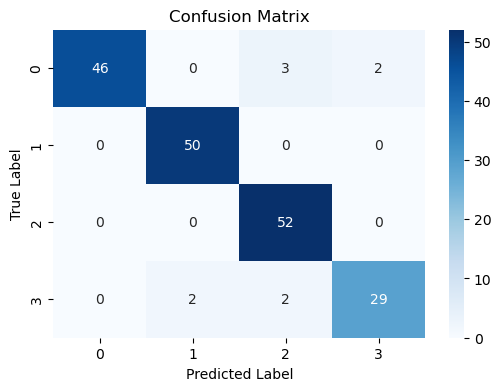

Model saved as 'knn_model_pca.pkl'


In [17]:
import joblib
import seaborn as sns
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
joblib.dump(cv.best_estimator_, 'knn_model.pkl')
print("Model saved as 'knn_model_pca.pkl'")

In [19]:
# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline
steps = [('SVM', SVC())]

pipeline = Pipeline(steps)

#input
X = result_df.iloc[:,0:-1]

#target
y=result_df.iloc[:,-1]

# Specify the hyperparameter space, if we increase the penalty(c) and gamma value the accurancy can be increased.

parameters = {'SVM__C':[10],'SVM__gamma':[1]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

cv = GridSearchCV(pipeline,parameters,cv=3)
cv.fit(X_train,y_train)

y_pred = cv.predict(X_test)
SVM_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
SVM_Accuracy=cv.score(X_test, y_test)

print("Accuracy: {}".format(SVM_Accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.9139784946236559
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        54
           1       1.00      1.00      1.00        50
           2       1.00      0.74      0.85        53
           3       1.00      0.93      0.96        29

    accuracy                           0.91       186
   macro avg       0.94      0.92      0.92       186
weighted avg       0.93      0.91      0.91       186



In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [25]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {}".format(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.9139784946236559
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        54
           1       1.00      1.00      1.00        50
           2       0.84      0.92      0.88        53
           3       0.90      0.93      0.92        29

    accuracy                           0.91       186
   macro avg       0.92      0.92      0.92       186
weighted avg       0.92      0.91      0.91       186



In [27]:
# Import the necessary modules for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Setup the pipeline
steps = [('RandomForest', RandomForestClassifier(random_state=42))]

pipeline = Pipeline(steps)

# Input and target
X = result_df.iloc[:, :-1]
y = result_df.iloc[:, -1]

# Specify the hyperparameter space
# Adjust the range and values of n_estimators and max_depth for a more extensive search
parameters = {
    'RandomForest__n_estimators': [150],  # Number of trees in the forest
    'RandomForest__max_depth': [10],     # Maximum depth of the tree
    'RandomForest__min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'RandomForest__min_samples_leaf': [1]    # Minimum number of samples required to be at a leaf node
}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Initialize GridSearchCV
cv = GridSearchCV(pipeline, parameters, cv=3)
cv.fit(X_train, y_train)

# Make predictions
y_pred = cv.predict(X_test)

# Compute and print metrics
RandomForest_Accuracy = cv.score(X_test, y_test)

print("Accuracy: {:}".format(RandomForest_Accuracy))
print(classification_report(y_test, y_pred))


Accuracy: 0.9086021505376344
              precision    recall  f1-score   support

           0       0.95      0.76      0.85        54
           1       1.00      1.00      1.00        50
           2       0.81      0.96      0.88        53
           3       0.90      0.93      0.92        29

    accuracy                           0.91       186
   macro avg       0.92      0.91      0.91       186
weighted avg       0.92      0.91      0.91       186



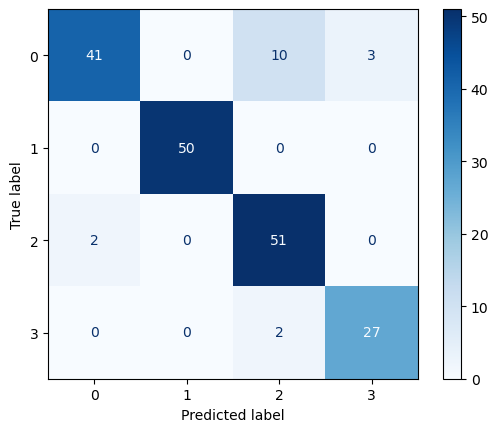

In [29]:
# Import necessary modules for confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cv.classes_)
disp.plot(cmap='Blues')  
plt.show()


In [31]:
import joblib

# Save the trained model
joblib.dump(cv.best_estimator_, 'random_forest_model_pca.pkl')

print("Model saved successfully!")


Model saved successfully!


In [33]:
import numpy as np
# Randomly select a sample from X_test
random_index = np.random.choice(X_test.index)  # Choose a random index from X_test
random_sample = X_test.loc[[random_index]]      # Get the corresponding sample, wrapped in a DataFrame to retain feature names
random_true_label = y_test.loc[random_index]    # Get the true label of the sample

# Predict the label for the random sample
random_pred = cv.predict(random_sample)        # Pass the sample as a DataFrame

# Print the random sample details and prediction
print("Random Sample Features:")
print(random_sample)
print("True Label:", random_true_label)
print("Predicted Label:", random_pred[0])  # The model returns a 1D array, so get the first element

Random Sample Features:
          PC1       PC2        PC3       PC4       PC5        PC6        PC7  \
714 -4.354913 -5.535097  12.592596 -3.750828 -7.306136 -10.522193  15.105015   

           PC8       PC9       PC10  ...     PC139     PC140    PC141  \
714  22.150236 -0.073458  10.889971  ...  0.978009 -1.446874 -0.52773   

        PC142     PC143     PC144     PC145     PC146     PC147     PC148  
714 -0.414165 -0.002517 -0.369249  0.337744 -0.502245 -0.318594  0.146186  

[1 rows x 148 columns]
True Label: 1
Predicted Label: 1


In [35]:
import numpy as np
# Randomly select a sample from X_test
random_index = np.random.choice(X_test.index)  # Choose a random index from X_test
random_sample = X_test.loc[[random_index]]      # Get the corresponding sample, wrapped in a DataFrame to retain feature names
random_true_label = y_test.loc[random_index]    # Get the true label of the sample

# Predict the label for the random sample
random_pred = cv.predict(random_sample)        # Pass the sample as a DataFrame

# Print the random sample details and prediction
print("Random Sample Features:")
print(random_sample)
print("True Label:", random_true_label)
print("Predicted Label:", random_pred[0])  # The model returns a 1D array, so get the first element

Random Sample Features:
         PC1        PC2       PC3       PC4       PC5       PC6        PC7  \
79 -1.215909 -21.426889 -1.920147  6.032502  6.782845 -3.728418  12.193316   

        PC8       PC9      PC10  ...     PC139     PC140     PC141     PC142  \
79 -1.00705 -7.494708 -0.483533  ...  1.361169 -0.966985  0.344028  4.301353   

       PC143     PC144     PC145     PC146     PC147     PC148  
79 -0.653602 -3.806772  3.921683  1.903611 -0.335459  2.729502  

[1 rows x 148 columns]
True Label: 2
Predicted Label: 2
